# WeatherPy
----

### Analysis
* The temperature is warmer close to the equater (0 Deg. Latitude). The southern hemisphere tends to be warmer this time of year than the northern hemisphere.
* Humidity?
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and wind speed.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# today's date
import datetime
today = datetime.datetime.now()
today_str = today.strftime("%m/%d/%y")
today_str

'03/20/19'

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [9]:
#subset_cities = cities[0:10]
#subset_cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# For temperature in Fahrenheit use units = imperial
# For temperature in Celsius use units = metric
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Store responses
found_cities = []
clouds = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval\n-----------------------------")
count=0
set_num=1
for city in cities:
    print(f"Processing Record {count} of Set {set_num} | {city}")
    try:
        response = requests.get(query_url + city).json()
        #print(query_url+city)
        #print(json.dumps(response, indent=4, sort_keys=True))
        found_cities.append(response['name']) 
        clouds.append(response['clouds']['all']) #cloudiness
        country.append(response['sys']['country']) #country
        date.append(response['dt']) #date
        humidity.append(response['main']['humidity']) #humidity
        lat.append(response['coord']['lat']) #lat
        lng.append(response['coord']['lon']) #lng
        max_temp.append(response['main']['temp_max']) #max temp
        wind_speed.append(response['wind']['speed']) #wind speed
    except Exception as err:
        print("City not found. Skipping...")
        #print(err)
    count= count+1
    
    
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | yellowknife
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | banda aceh
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | saint-joseph
Processing Record 7 of Set 1 | cockburn town
Processing Record 8 of Set 1 | almazar
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 1 | eydhafushi
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | havoysund
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | pevek
Processing Record

Processing Record 183 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 184 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 185 of Set 1 | baoying
Processing Record 186 of Set 1 | benalla
Processing Record 187 of Set 1 | port hardy
Processing Record 188 of Set 1 | diffa
Processing Record 189 of Set 1 | guerande
Processing Record 190 of Set 1 | vanimo
Processing Record 191 of Set 1 | laguna
Processing Record 192 of Set 1 | shenzhen
Processing Record 193 of Set 1 | ambilobe
Processing Record 194 of Set 1 | velykyy burluk
City not found. Skipping...
Processing Record 195 of Set 1 | hvammstangi
City not found. Skipping...
Processing Record 196 of Set 1 | castro
Processing Record 197 of Set 1 | polysayevo
Processing Record 198 of Set 1 | bursol
City not found. Skipping...
Processing Record 199 of Set 1 | serenje
Processing Record 200 of Set 1 | bahawalnagar
Processing Record 201 of Set 1 | quelimane
Processing Record 202 of Set 1 | tuatapere
P

Processing Record 370 of Set 1 | oranjestad
Processing Record 371 of Set 1 | orlik
Processing Record 372 of Set 1 | udomlya
Processing Record 373 of Set 1 | takoradi
Processing Record 374 of Set 1 | esperance
Processing Record 375 of Set 1 | camocim
Processing Record 376 of Set 1 | riyadh
Processing Record 377 of Set 1 | xuddur
Processing Record 378 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 379 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 380 of Set 1 | esil
Processing Record 381 of Set 1 | sanmenxia
Processing Record 382 of Set 1 | iquitos
Processing Record 383 of Set 1 | toliary
City not found. Skipping...
Processing Record 384 of Set 1 | ixtapa
Processing Record 385 of Set 1 | lerwick
Processing Record 386 of Set 1 | ravar
Processing Record 387 of Set 1 | belmonte
Processing Record 388 of Set 1 | barra
Processing Record 389 of Set 1 | comodoro rivadavia
Processing Record 390 of Set 1 | linjiang
Processing Record 391 of Set 1 | gizeh
Ci

Processing Record 553 of Set 1 | los llanos de aridane
Processing Record 554 of Set 1 | ust-barguzin
Processing Record 555 of Set 1 | arlit
Processing Record 556 of Set 1 | sangar
Processing Record 557 of Set 1 | smirnykh
Processing Record 558 of Set 1 | wuda
Processing Record 559 of Set 1 | campo grande
Processing Record 560 of Set 1 | bratsk
Processing Record 561 of Set 1 | ereymentau
Processing Record 562 of Set 1 | forrest city
Processing Record 563 of Set 1 | macaboboni
City not found. Skipping...
Processing Record 564 of Set 1 | jieshi
Processing Record 565 of Set 1 | lukovetskiy
Processing Record 566 of Set 1 | impfondo
Processing Record 567 of Set 1 | komsomolskiy
Processing Record 568 of Set 1 | vila franca do campo
Processing Record 569 of Set 1 | marsa matruh
Processing Record 570 of Set 1 | chuchkovo
Processing Record 571 of Set 1 | buribay
Processing Record 572 of Set 1 | kalmunai
Processing Record 573 of Set 1 | aquin
Processing Record 574 of Set 1 | ercis
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_weather_dict = {
    "City": found_cities,
    "Cloudiness": clouds,
    "country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}
city_weather_data = pd.DataFrame(city_weather_dict)
print(city_weather_data.count())
city_weather_data.head()

City          557
Cloudiness    557
country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64


,City,Cloudiness,country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,40,CA,1553108400,94,62.45,-114.38,46.40,9.17
1,Saldanha,0,PT,1553111246,51,41.42,-6.55,46.72,11.01
2,Rikitea,8,PF,1553111730,99,-23.12,-134.97,78.76,23.76
3,Banda Aceh,68,ID,1553111689,98,5.56,95.32,75.61,1.72
4,Busselton,24,AU,1553111114,50,-33.64,115.35,69.01,18.16


In [12]:
city_weather_data.to_csv(output_data_file)

In [13]:
city_weather_data[city_weather_data["Humidity"]>100]

,City,Cloudiness,country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
346,Iquitos,90,PE,1553108400,319,-3.75,-73.25,42.8,5.82


In [23]:
iquitos = requests.get(query_url + "iquitos").json()
print(json.dumps(iquitos, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -3.75,
        "lon": -73.25
    },
    "dt": 1553108400,
    "id": 3696183,
    "main": {
        "humidity": 319,
        "pressure": 1011,
        "temp": 42.8,
        "temp_max": 42.8,
        "temp_min": 42.8
    },
    "name": "Iquitos",
    "sys": {
        "country": "PE",
        "id": 8694,
        "message": 0.0038,
        "sunrise": 1553079428,
        "sunset": 1553123034,
        "type": 1
    },
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 220,
        "speed": 5.82
    }
}


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

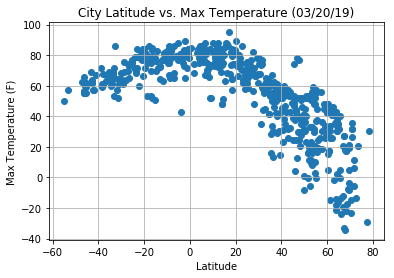

In [14]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Max Temp"], marker="o")

plt.title(f"City Latitude vs. Max Temperature ({today_str})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

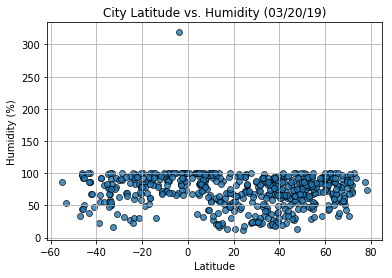

In [15]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Humidity"], marker="o",
           alpha="0.8",edgecolors="black",linewidths="0.8")

plt.title(f"City Latitude vs. Humidity ({today_str})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

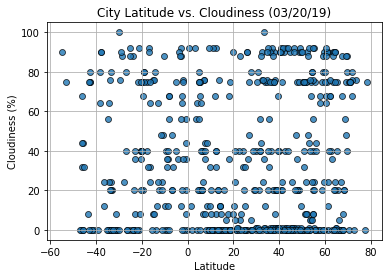

In [16]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Cloudiness"], marker="o",
           alpha="0.8",edgecolors="black",linewidths="0.8")

plt.title(f"City Latitude vs. Cloudiness ({today_str})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

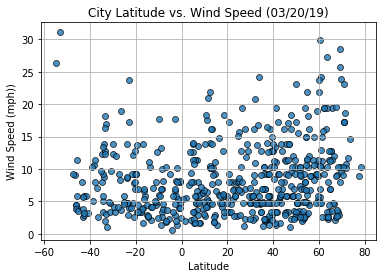

In [17]:
plt.scatter(city_weather_data["Lat"], city_weather_data["Wind Speed"], marker="o",
           alpha="0.8",edgecolors="black",linewidths="0.8")

plt.title(f"City Latitude vs. Wind Speed ({today_str})")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/latitude_vs_windspeed.png")
plt.show()